<a href="https://colab.research.google.com/github/eliasalemann/UNI/blob/main/EX3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJETIVO**:

Agrupar 100 recetas de reposteria en 2 o mas grupos con caracteristicas similares (clusteres). Se utilizara la libreria 'Pycaret'


**RESULTADOS:**
1.   El modelo actual permite identificar el tipo de panaderia con una precision del 100, basado en una muestra de 80 observaciones de entrenamiento y 20 muestras de prueba
2.   Los ingredientes mas importantes para identificar las panaderias de tipo 1 son la harina (menores cantidades, mayor probabilidad), azucar y huevos (mayores cantidades, mayor probabilidad) 

A. Lectura de datos

In [2]:
#Instalando Pycaret
#!pip install pycaret

#Importando Pandas
import pandas as pd
 
#Web link
link = "https://raw.githubusercontent.com/eliasalemann/UNI/main/data/pastry2.csv"
 
#Leyendo archivo csv
df = pd.read_csv(link)

B. Analisis exploratorio




1.   La base de datos contiene 100 recetas de distintos tipos de reposteria
2.   Los rangos de las variables parecen correctos, excepto la variable 'Salt' que tiene varianza 0, esta variable se borrara eventualmente.



In [4]:
#Rango de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Flour,100.0,44.30,6.982663,33.0,38.00,42.5,50.00,59.0
Milk,100.0,18.51,6.780088,0.0,13.75,17.0,24.00,37.0
Sugar,100.0,17.72,7.488820,0.0,12.00,19.0,23.00,36.0
Butter,100.0,11.43,5.152728,1.0,8.00,10.0,15.25,27.0
Egg,100.0,6.90,3.157483,0.0,5.00,6.0,9.00,16.0
Baking Powder,100.0,1.34,0.699495,0.0,1.00,1.0,2.00,3.0
Vanilla,100.0,0.56,0.537860,0.0,0.00,1.0,1.00,2.0
Salt,100.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0




3.   No hay valores nulos, ni duplicados y el tipo de datos es aceptable (todas las variables son numericas)




In [5]:
#Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Flour          100 non-null    int64
 1   Milk           100 non-null    int64
 2   Sugar          100 non-null    int64
 3   Butter         100 non-null    int64
 4   Egg            100 non-null    int64
 5   Baking Powder  100 non-null    int64
 6   Vanilla        100 non-null    int64
 7   Salt           100 non-null    int64
dtypes: int64(8)
memory usage: 6.4 KB


In [6]:
#Valores nulos
df.isnull().sum()

Flour            0
Milk             0
Sugar            0
Butter           0
Egg              0
Baking Powder    0
Vanilla          0
Salt             0
dtype: int64

In [7]:
#Valores duplicados
df.duplicated().sum()

0

4.   Basado en el analis numerico y grafico de correlaciones: 
*   El tipo de reposteria 1 contiene mayores cantidades de azucar (Sugar), 'Mantequilla' (Butter) y Huevos (Egg) que el tipo 0 (correlaciones varian de moderadas a muy altas)
*   El tipo de reposteria 1 continene menores cantidades de harina (Flour) y leche (Milk) que el tipo 0 (correlaciones varian de moderadas a muy altas)





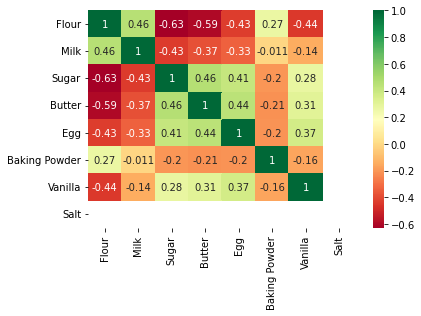

In [8]:
##Analisis correlacional numerico
import seaborn as sb
sb.heatmap(df.corr(), annot=df.corr(), cmap = 'RdYlGn')

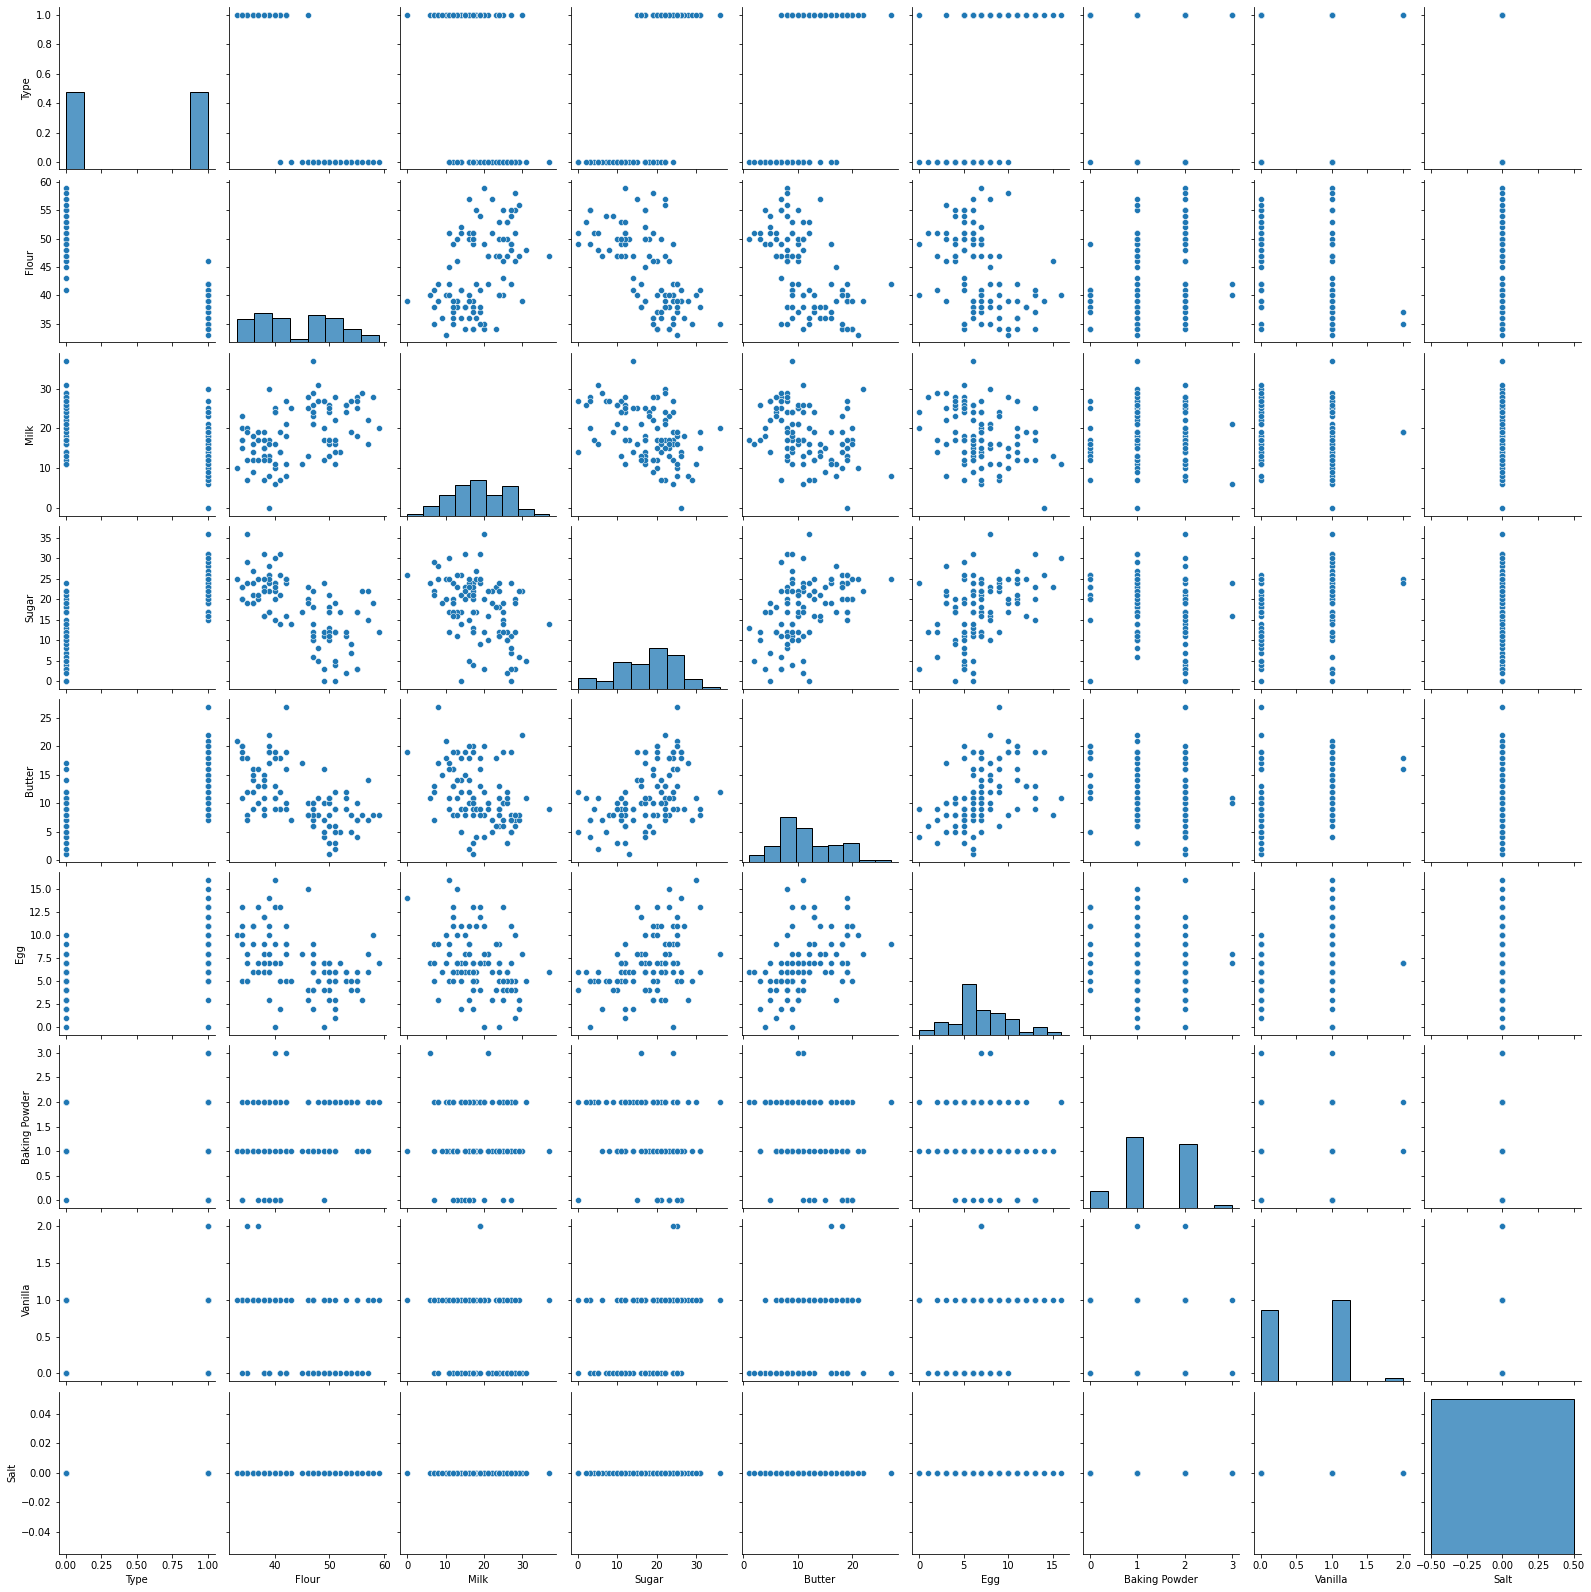

In [ ]:
#Analisis correlacional grafico
sb.pairplot(df)

C. Modelado de datos


In [ ]:
#Importando la libreria de clasificacion
from pycaret.regression import *

#Definicion del modelo
set_up = setup(df,
      target = 'Flour',
      ignore_features = ['Salt'],  #Se elimina por la falta de varianza
      numeric_features = ['Egg'],  #Se modelara como una variable continua
      categorical_features = [],
      train_size = .8,             #Se usara el 80% de los datos para escojer el mejor algoritmo
      normalize = False,
      silent = True)

#Escogiendo el mejor algoritmo y ajustando los hiper-parametros
mejor = compare_models(fold = 5)

modelo_final_noajustado = create_model(mejor, fold = 5)

modelo_final_ajustado = tune_model(modelo_final_noajustado, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3471,19.6971,4.4381,0.6045,0.0969,0.0743
1,2.4072,10.8226,3.2898,0.8110,0.0696,0.0532
2,2.2552,6.7057,2.5895,0.7594,0.0612,0.0538
3,2.9045,13.3187,3.6495,0.7472,0.0782,0.0662
4,2.1491,6.7435,2.5968,0.8160,0.0555,0.0488
Mean,2.6126,11.4575,3.3127,0.7476,0.0723,0.0593
SD,0.4493,4.8282,0.6951,0.0766,0.0145,0.0095


El mejor modelo es

In [ ]:
modelo_final_ajustado

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=5,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0, min_impurity_split=None,
                    min_samples_leaf=3, min_samples_split=10,
                    min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                    oob_score=False, random_state=3493, verbose=0,
                    warm_start=False)

D. Resultados




1.   El modelo actual es capaz de explicar el 84% de la varianza en las cantidades de harina (flour) en los datos de entrenamiento (basado en el 80% de los datos) y el 85% de la varianza en los datos de prueba. Esto significa que aproximademete el 20% de la varianza de la cantidad de harina no puede ser explicado por los otros ingredientes. El desempeno puede cambiar con nuevas observaciones


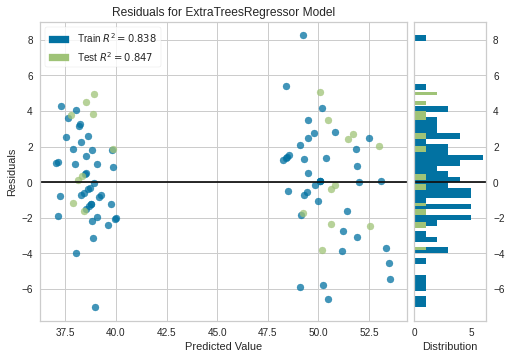

In [ ]:
#Evaluacion del modelo
plot_model(modelo_final_ajustado, plot = 'residuals')

#Guardando el modelo final para futuras clasificaciones
modelo_final = finalize_model(modelo_final_ajustado)

2.   Las cantidades de harina en cada receta parecen depender mas que todo del tipo de panaderia

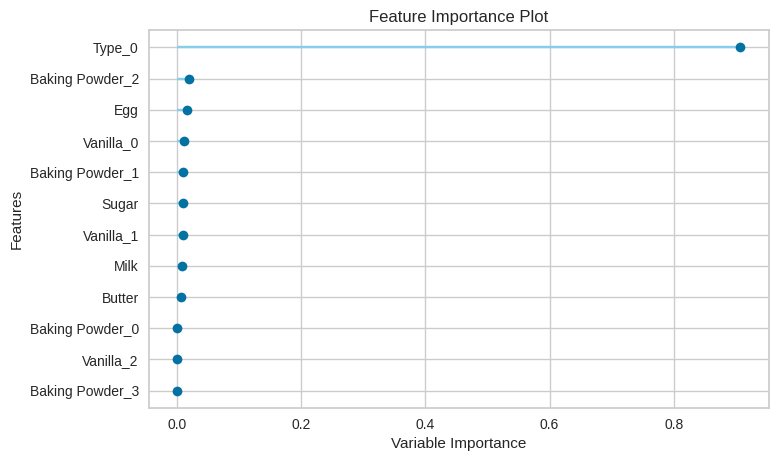

In [ ]:
plot_model(modelo_final, plot = 'feature_all')